## Imports

In [18]:
%config InlineBackend.figure_format = 'retina'

import warnings
import matplotlib
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from cycler import cycler
from statsmodels.api import tsa
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
from matplotlib.colors import colorConverter, Colormap

warnings.filterwarnings('ignore')

np.random.seed(222)
pd.set_option('display.max_columns', None)
plt.rcdefaults()
plt.rcParams['font.family'] = 'serif'
plt.style.use('seaborn-paper')
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.grid'] = False
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'brown', 'lime', 'c', 'purple', 'orange', 'navy', 'grey'] * 4) +
                           cycler('linestyle', ['-', '--', '-.', ':'] * 8) + 
                           cycler('marker', list(matplotlib.markers.MarkerStyle.markers.keys())[:32]) + 
                           cycler('linewidth', [1, 1, 2, 2, 1, 2, 1] * 4 + [1, 1, 2, 2])))

## Data Loading and Summaries

In [19]:
# I've changed and saved data as the new version. Rescaled and in the right types now.
data = pd.read_csv('./data/Dataset_1992-2011.csv')

In [20]:
data.dtypes

Year                     int64
Province                object
Pop                    float64
UnempRate              float64
GDP                    float64
CPI                    float64
RailToBeijing          float64
RailToTianjin          float64
RailToHebei            float64
RailToShanxi           float64
RailToInnerMongolia    float64
RailToLiaoning         float64
RailToJilin            float64
RailToHeilongjiang     float64
RailToShanghai         float64
RailToJiangsu          float64
RailToZhejiang         float64
RailToAnhui            float64
RailToFujian           float64
RailToJiangxi          float64
RailToShandong         float64
RailToHenan            float64
RailToHubei            float64
RailToHunan            float64
RailToGuangdong        float64
RailToGuangxi          float64
RailToHainan           float64
RailToChongqing        float64
RailToSichuan          float64
RailToGuizhou          float64
RailToYunnan           float64
RailToTibet            float64
RailToSh

In [21]:
data.head().T

0        1       2       3              4
Year                    1992     1992    1992    1992           1992
Province             Beijing  Tianjin   Hebei  Shanxi  InnerMongolia
Pop                    11.02     8.79   62.75   29.79          22.07
UnempRate                0.3      1.1     2.5     0.7            3.3
GDP                    70.91     41.1  127.85   55.11          42.17
CPI                    109.9    111.4   106.1   107.3          107.4
RailToBeijing           9730     1470   13140   15780            950
RailToTianjin           3150     4240   18380   17360           3190
RailToHebei             4810     3220   44730   83060           9340
RailToShanxi             950     1170    3170   26810           1460
RailToInnerMongolia      580     1030    2300    2800          29770
RailToLiaoning          1230      770    6710   15440           7170
RailToJilin              320      260    1120    2470           3720
RailToHeilongjiang       620      450    1570     840           9480
RailToShanghai           350      200     730    1310            150
RailToJiangsu            770      710    2550   16470            700
RailToZhejiang           350      300     830    2400            290
RailToAnhui              160      150     510    5140            210
RailToFujian             180      240     660    1430             90
RailToJiangxi             80       80     360    1390             90
RailToShandong           310      550    3110   24850           1500
RailToHenan             1000      730    2090    6920            730
RailToHubei              540      330    1990    9430            360
RailToHunan              370      170     840    3610            230
RailToGuangdong         1100      780    2210    1750            340
RailToGuangxi            130       90     880    1720            120
RailToHainan               0        0       0       0              0
RailToChongqing            0        0       0       0              0
RailToSichuan            480      270    1040    1130            270
RailToGuizhou             90       50     150      80             40
RailToYunnan             110       90     230      60             30
RailToTibet                0        0       0       0              0
RailToShaanxi            310      360     400    1930            210
RailToGansu              140      270     300     430            340
RailToQinghai             50       60      80     410            160
RailToNingxia             70      130     170     250            870
RailToXinjiang           140      370     210      80             80
Rail_Total             28120    18540  110460  245350          71890

In [22]:
data.describe().T

count          mean           std      min         25%  \
Year                 620.0   2001.500000      5.770937  1992.00   1996.7500   
Pop                  620.0     40.866226     26.609978     2.29     20.8375   
UnempRate            602.0      3.411794      1.002963     0.30      2.8000   
GDP                  620.0    560.659226    731.602165     3.33    126.4075   
CPI                  610.0    105.045574      6.680100    96.40    100.6000   
RailToBeijing        616.0   1708.133117   3722.440967     0.00    130.0000   
RailToTianjin        615.0   2869.951220   7208.709004     0.00    130.0000   
RailToHebei          616.0   9502.922078  34644.409494     0.00    307.5000   
RailToShanxi         617.0   2011.330956   5789.285486     0.00    180.0000   
RailToInnerMongolia  616.0   2136.185065   8593.549967     0.00     90.0000   
RailToLiaoning       618.0   6643.655340  19271.432919     0.00    180.0000   
RailToJilin          617.0   2376.952998   6049.940011     0.00     60.0000   
RailToHeilongjiang   615.0   3579.821138  12459.663131     0.00    100.0000   
RailToShanghai       616.0    760.389610    786.356739     0.00    230.0000   
RailToJiangsu        616.0   3200.616883   5634.527669     0.00    430.0000   
RailToZhejiang       615.0   1827.837398   2753.461080     0.00    365.0000   
RailToAnhui          617.0   2059.367909   6926.383969     0.00    150.0000   
RailToFujian         617.0   1120.761750   2814.307123     0.00    140.0000   
RailToJiangxi        618.0   1652.313916   3360.118561     0.00    150.0000   
RailToShandong       616.0   4708.409091  13470.304132     0.00    340.0000   
RailToHenan          618.0   2610.097087   5428.939322     0.00    422.5000   
RailToHubei          617.0   2624.959481   5628.120350     0.00    270.0000   
RailToHunan          618.0   2074.773463   3832.762294     0.00    272.5000   
RailToGuangdong      617.0   2163.192869   3250.365566     0.00    380.0000   
RailToGuangxi        617.0   1742.949757   3609.631019     0.00    140.0000   
RailToHainan         612.0    102.058824    588.023411     0.00      0.0000   
RailToChongqing      617.0    588.444084   1310.308595     0.00      0.0000   
RailToSichuan        618.0   2683.543689   6663.258695     0.00    510.0000   
RailToGuizhou        616.0    936.152597   2239.616032     0.00     80.0000   
RailToYunnan         617.0   1147.649919   2792.827343     0.00    130.0000   
RailToTibet          613.0     14.176183     70.366791     0.00      0.0000   
RailToShaanxi        618.0   1190.307443   2796.175393     0.00    210.0000   
RailToGansu          618.0   1500.760518   3732.823600     0.00    120.0000   
RailToQinghai        617.0    345.380875    991.734293     0.00     40.0000   
RailToNingxia        616.0    355.746753    997.014125     0.00     30.0000   
RailToXinjiang       616.0    712.678571   2237.667659     0.00    100.0000   
Rail_Total           620.0  66575.411613  80572.971818     0.00  24152.5000   

                           50%        75%        max  
Year                  2001.500   2006.250    2011.00  
Pop                     37.325     61.580     105.05  
UnempRate                3.500      4.000       7.40  
GDP                    304.320    693.335    5321.03  
CPI                    103.100    106.275     126.90  
RailToBeijing          290.000   1242.500   17910.00  
RailToTianjin          310.000   1245.000   39040.00  
RailToHebei            750.000   3807.500  347300.00  
RailToShanxi           450.000   1210.000   44020.00  
RailToInnerMongolia    220.000   1020.000  100210.00  
RailToLiaoning         435.000   1507.500  131150.00  
RailToJilin            180.000    550.000   36580.00  
RailToHeilongjiang     290.000    680.000   86310.00  
RailToShanghai         495.000   1082.500    4930.00  
RailToJiangsu          800.000   2247.500   36470.00  
RailToZhejiang         860.000   1950.000   23130.00  
RailToAnhui            360.000    640.000   62960.00  
RailToFujian           320.0

## A Unit-root Test

Based on the [KPSS test](https://en.wikipedia.org/wiki/KPSS_test).

In [105]:
def stationary(g, alpha=.05, verbose=False):
    # s is a Pandas.groupby object or a list object
    pvalues = np.array([tsa.stattools.kpss(s[1], 'ct')[1] for s in list(g)])
    if verbose: print(pvalues)
    if pvalues[~np.isnan(pvalues)].max() <= alpha:
        return True
    else:
        non_stationary = len(pvalues) - np.less_equal(pvalues, alpha).sum()
        print("{0} out of {1} series not trend-stationary".format(non_stationary, len(pvalues)))
        return False

## Plots and Test Results

Population

In [106]:
year = range(1992, 2012)

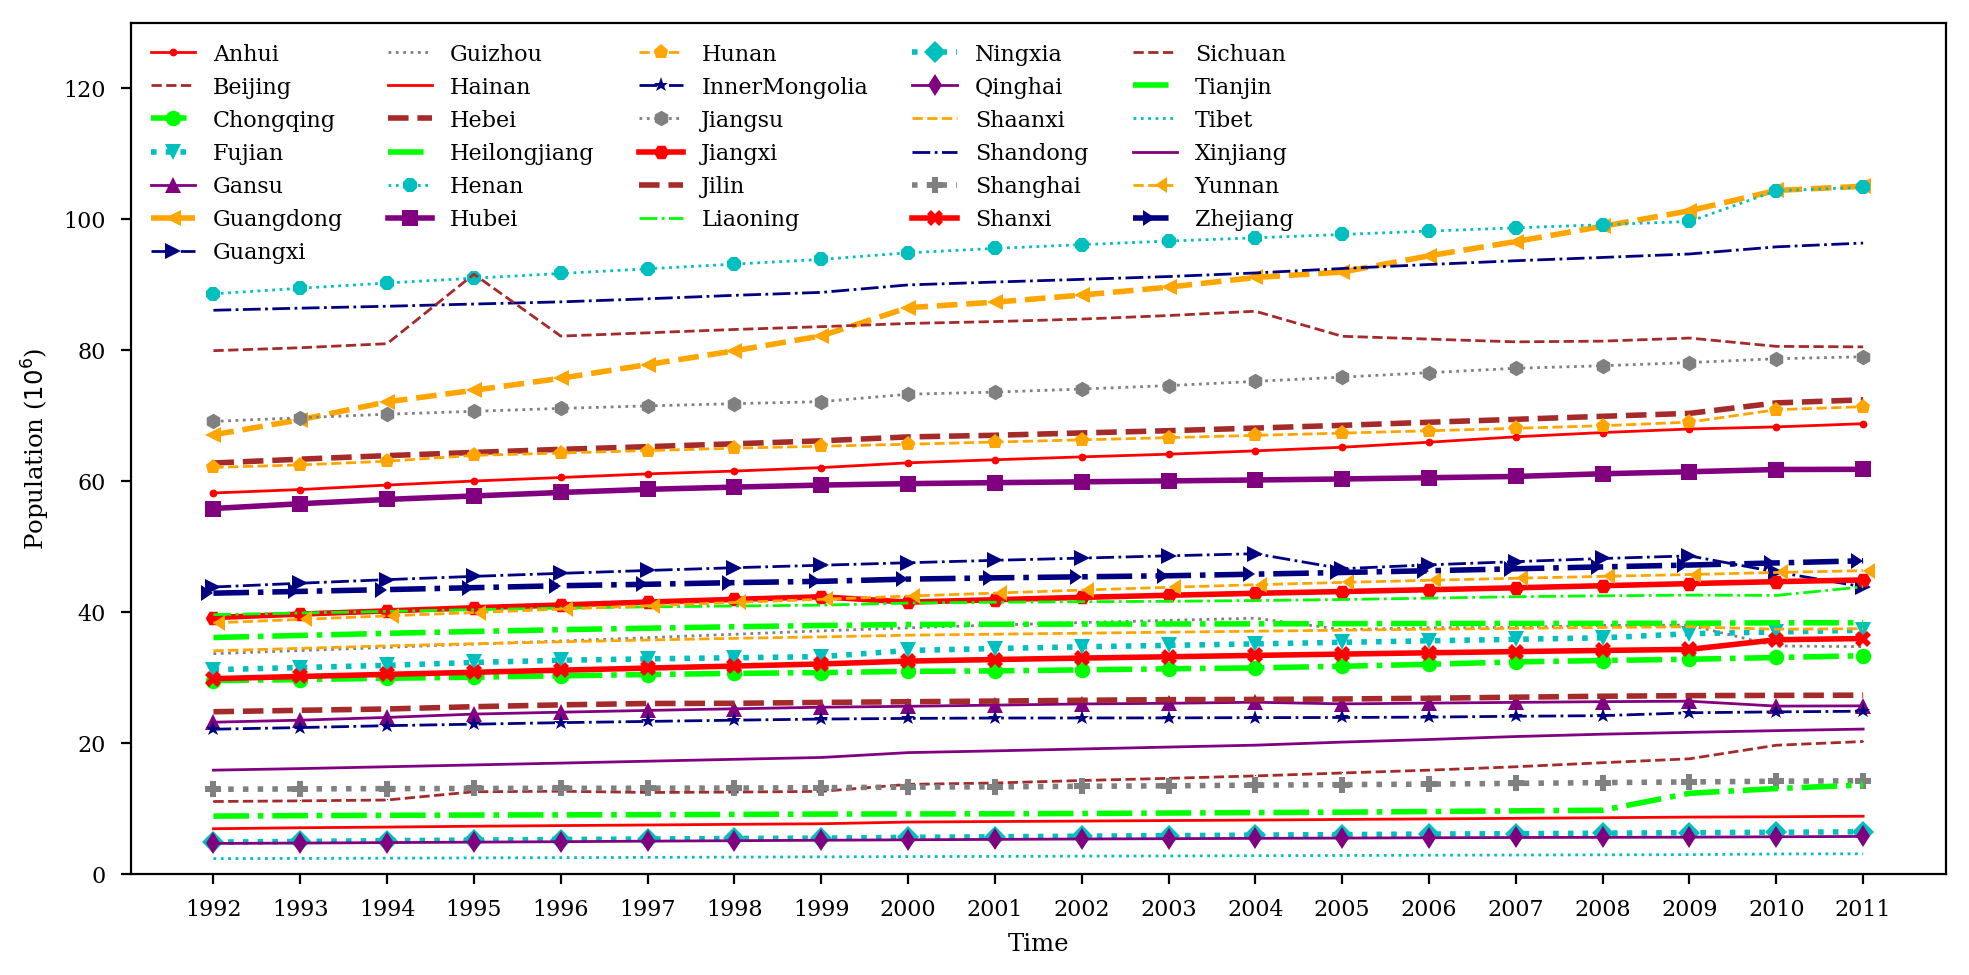

In [107]:
pop = data.Pop.groupby(data.Province)

fig = plt.figure()

ax = fig.add_subplot(111)
for province, p in pop:
    ax.plot(year, p, label=province)
ax.set_xticks(year)
ax.legend(loc='upper left', frameon=False, ncol=5)
ax.set_ylim(0,130)
ax.set_ylabel(r'Population ($10^6$)')
ax.set_xlabel('Time')

plt.tight_layout()
plt.savefig('plots/pop.pdf')
plt.show()

In [108]:
stationary(pop)

True

Unemployment rate

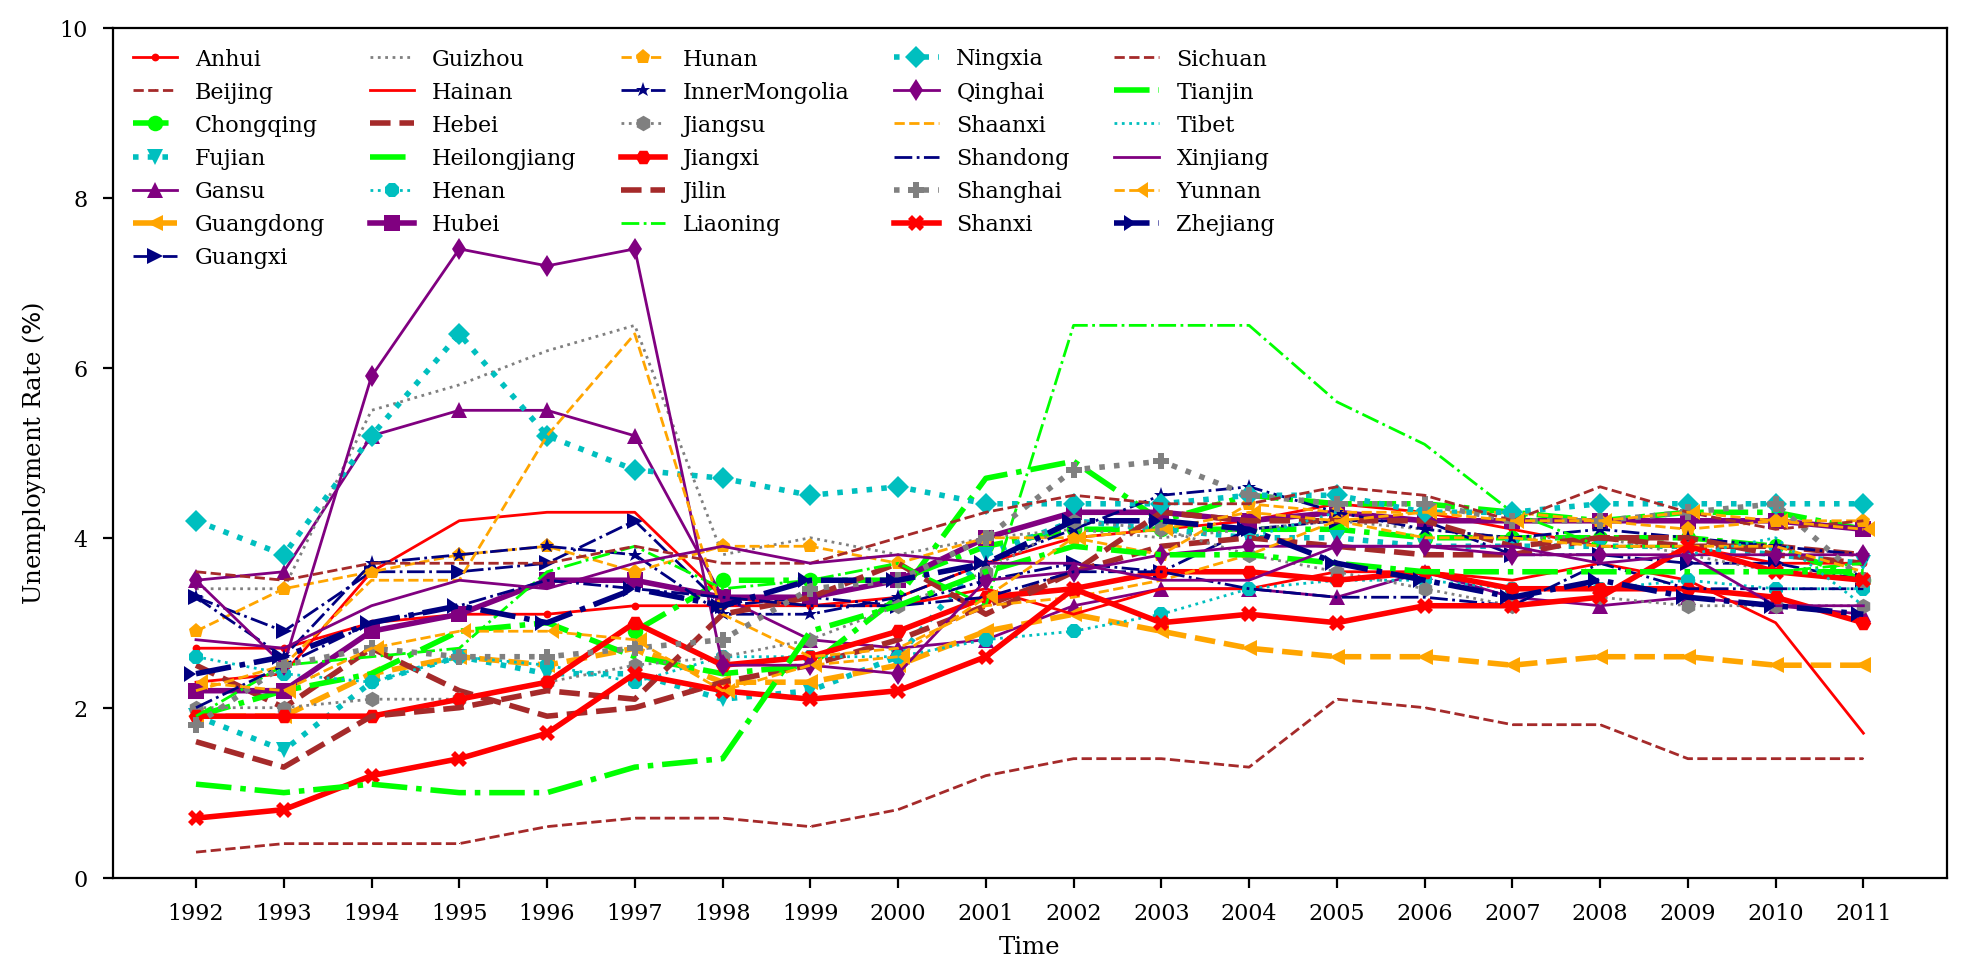

In [109]:
unemprate = data.UnempRate.groupby(data.Province)

fig = plt.figure()

ax = fig.add_subplot(111)
for province, r in unemprate:
    ax.plot(year, r, label=province)
ax.set_xticks(year)
ax.legend(loc='upper left', frameon=False, ncol=5)
ax.set_ylim(0,10)
ax.set_ylabel(r'Unemployment Rate ($\%$)')
ax.set_xlabel('Time')

plt.tight_layout()
plt.savefig('plots/unemp.pdf')
plt.show()

In [110]:
stationary(unemprate)

True

GDP

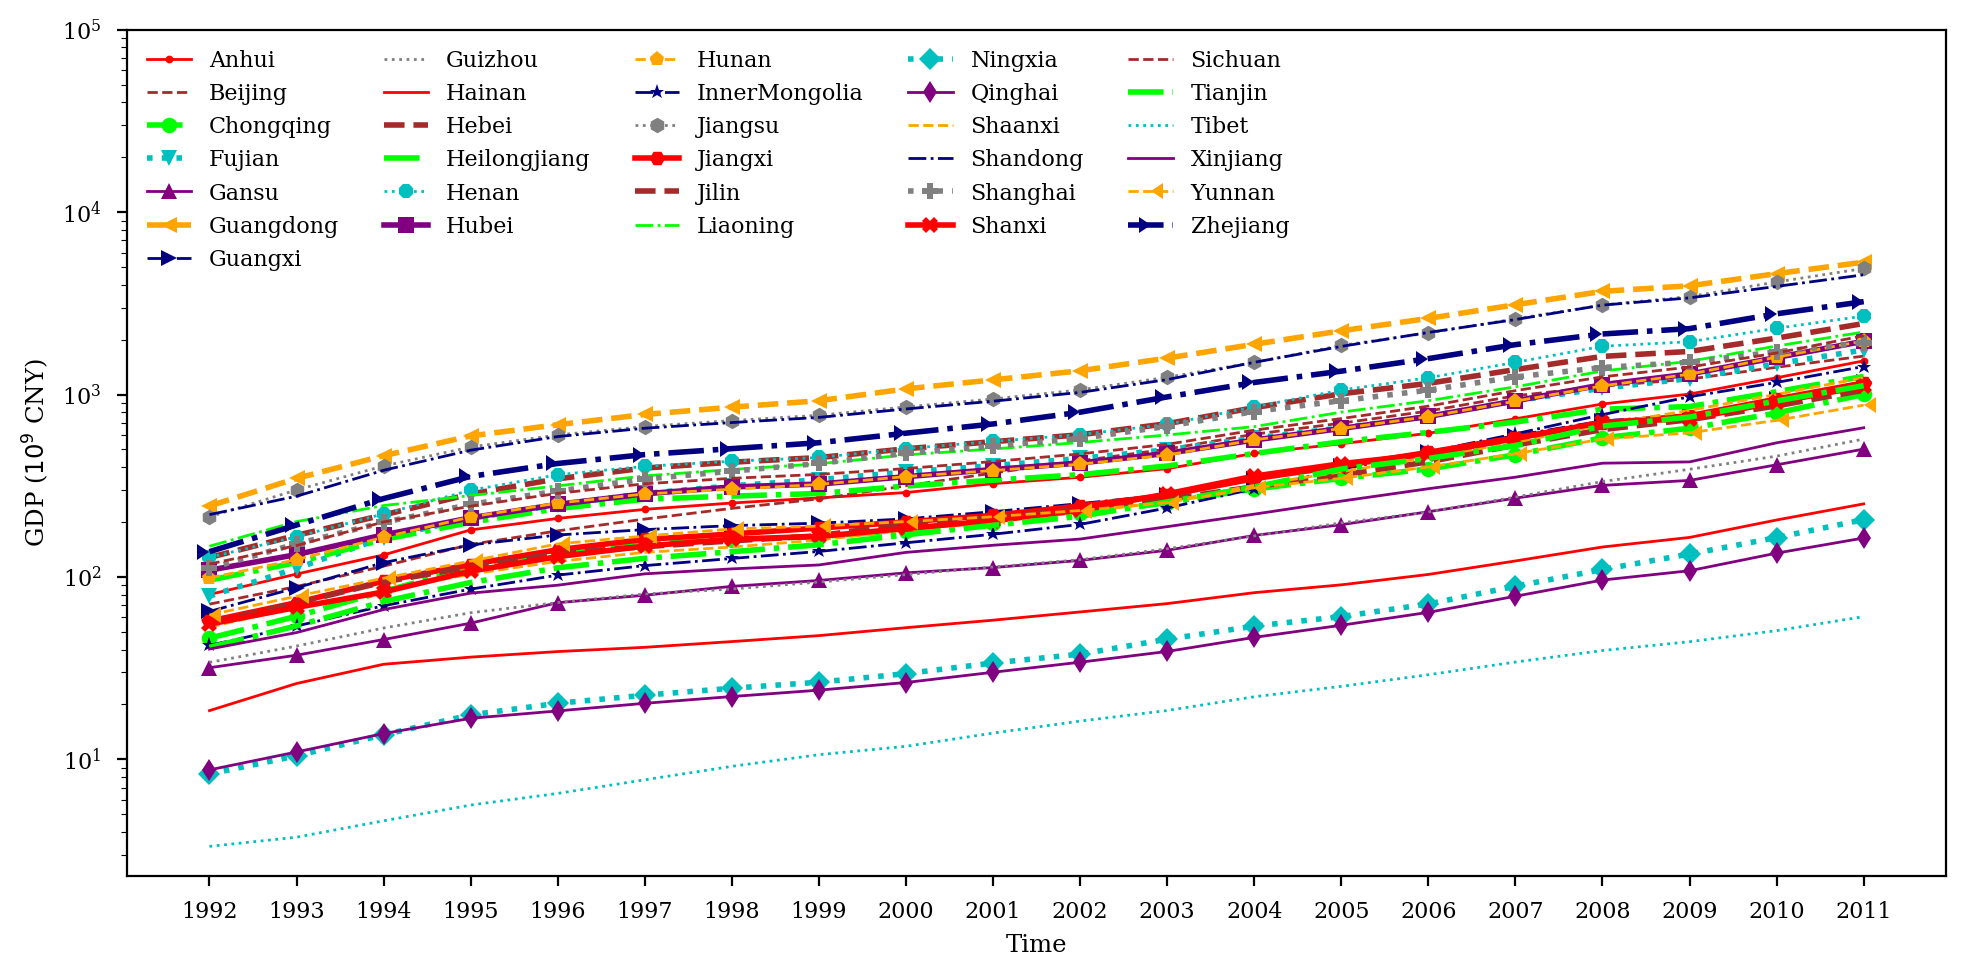

In [111]:
gdp = data.GDP.groupby(data.Province)

fig = plt.figure()

ax = fig.add_subplot(111)
for province, g in gdp:
    ax.plot(year, g, label=province)
ax.set_xticks(year)
ax.legend(loc='upper left', frameon=False, ncol=5)
ax.set_yscale('log')
ax.set_ybound(upper=1e5)
ax.set_ylabel(r'GDP ($10^9$ CNY)')
ax.set_xlabel('Time')

plt.tight_layout()
plt.savefig('plots/gdp_nom.pdf')
plt.show()

In [112]:
stationary(gdp)

True

Inflation = CPI - 100

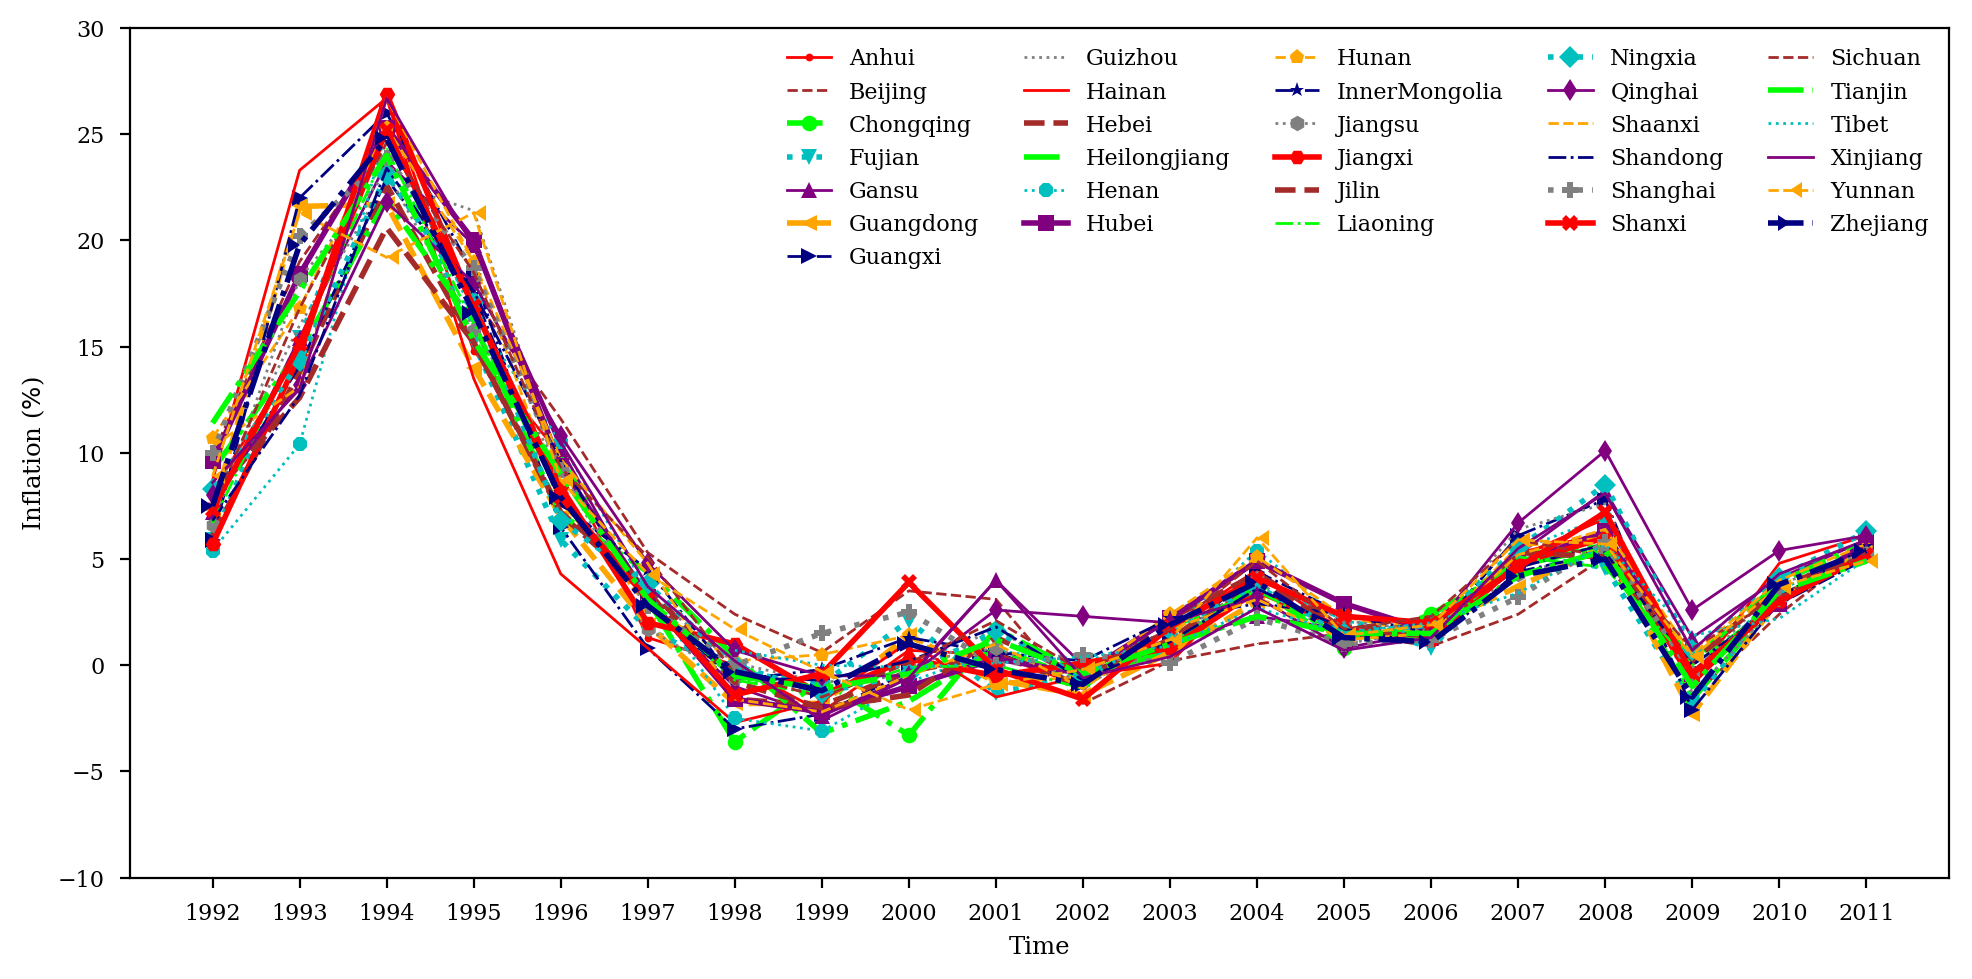

In [113]:
cpi = data.CPI.groupby(data.Province)

fig = plt.figure()

ax = fig.add_subplot(111)
for province, c in cpi:
    ax.plot(year, c-100, label=province)
ax.set_xticks(year)
ax.legend(loc='upper right', frameon=False, ncol=5)
ax.set_ylabel(r'Inflation ($\%$)')
ax.set_ylim(-10, 30)
ax.set_xlabel('Time')

plt.tight_layout()
plt.savefig('plots/inf.pdf')
plt.show()

In [115]:
stationary((data.CPI-100).groupby(data.Province))

True

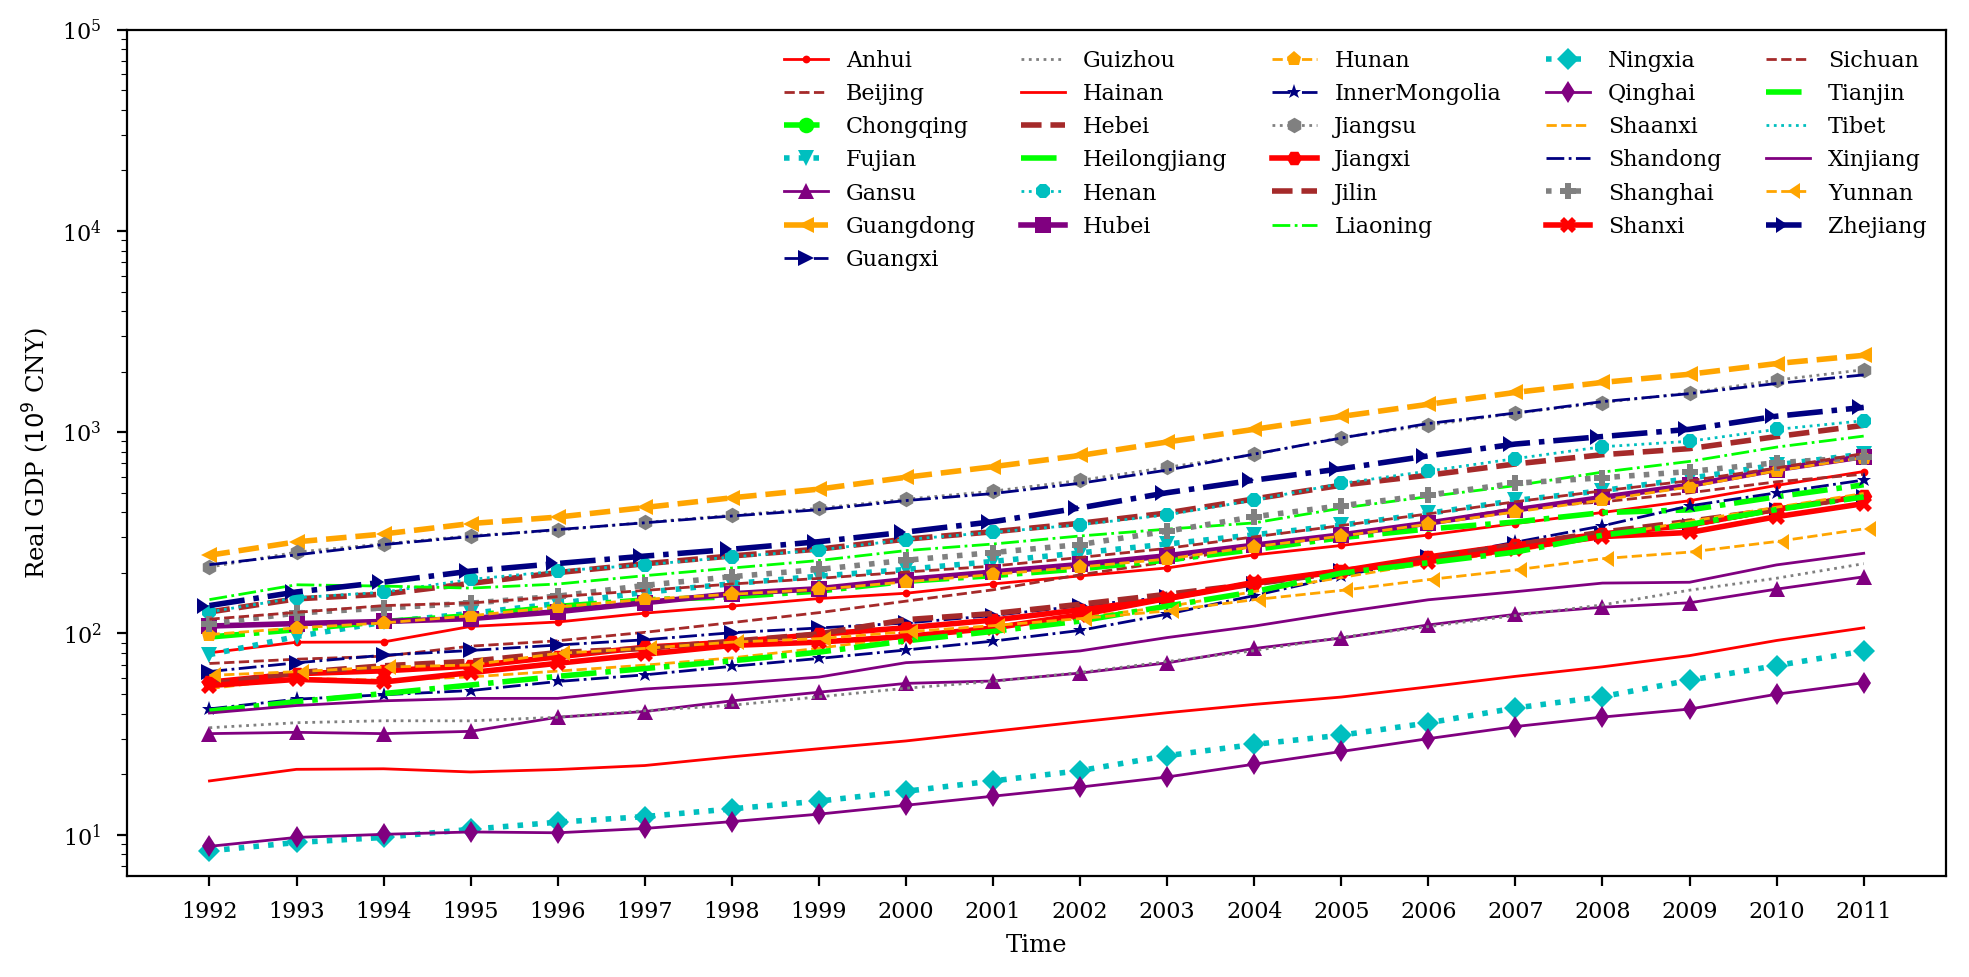

In [116]:
temp = []
for (p, g), (p, c) in zip(gdp, cpi):
    temp.append([p, g.values, c.values])
    
gdp_real = []
for t in temp:
    p = t[0]
    c = np.cumprod(t[2]/100)/(t[2][0]/100)
    g = t[1] / c
    gdp_real.append((p, g))
    
fig = plt.figure()

ax = fig.add_subplot(111)
for province, g in gdp_real:
    ax.plot(year, g, label=province)
ax.set_xticks(year)
ax.legend(loc='upper right', frameon=False, ncol=5)
ax.set_ylabel(r'Real GDP ($10^9$ CNY)')
ax.set_yscale('log')
ax.set_ybound(upper=1e5)
ax.set_xlabel('Time')

plt.tight_layout()
plt.savefig('plots/gdp_real.pdf')
plt.show()

In [117]:
stationary(gdp_real)

True

## Network Visualization

We try to fill NA with 0 here.

In [118]:
rail = data.ix[:,6:-1].fillna(0).astype(int).groupby(data.Year)
province = data.Province.unique()

In [119]:
from functions import draw_networkx_edges_with_arrows, plot_network

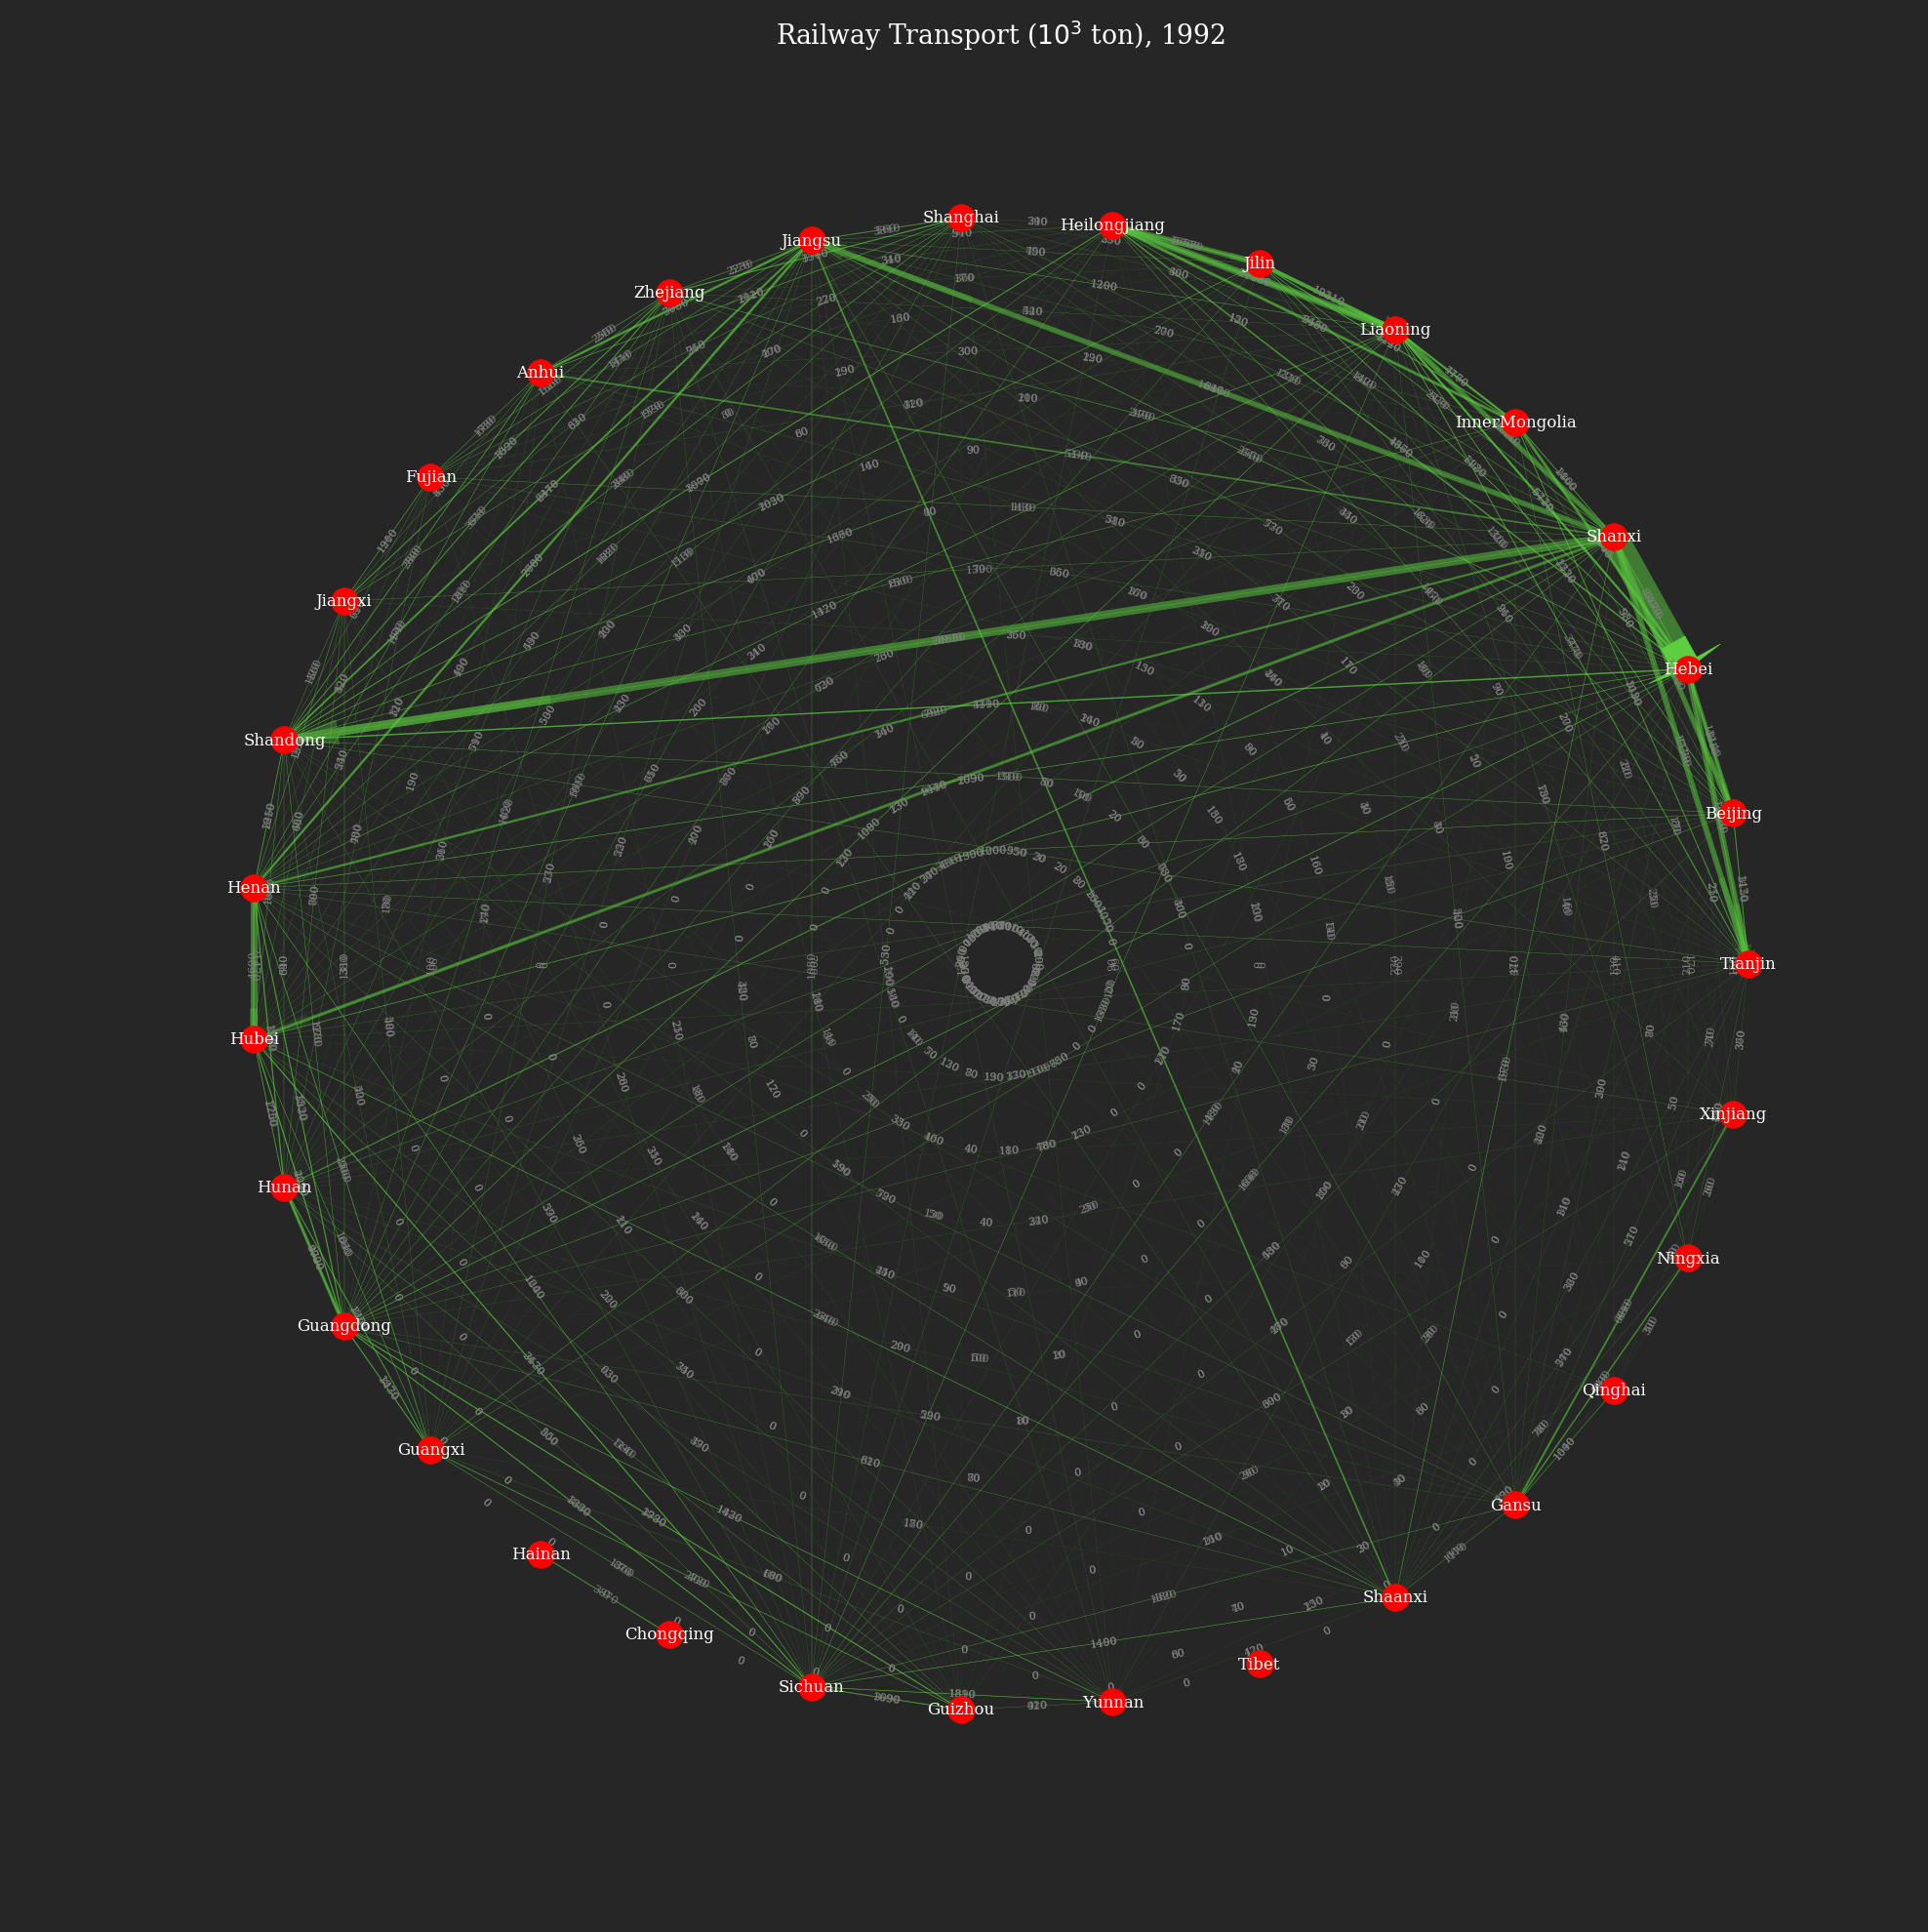

In [120]:
for temp in list(rail):
    year = temp[0]
    net = temp[1]
    net.index = province
    net = pd.concat([net.ix[:,i] for i in net.columns], axis=0)
    net = pd.concat([pd.Series(net.index), pd.Series(np.repeat(province, 31)), pd.Series(net.values)], axis=1, ignore_index=True)
    net.columns = ['source', 'target', 'flow']
    mask = net.source == net.target
    net = net[~mask]
    
    plot_network(plt, net, year, False)
    break # only plot 1992 for illustration

Check out [this webpage](http://allenfrostline.com/2017/11/29/network-visualization/) for the animated visualization.

The upper right regions are highly productive in coal and thus are mainly "exporters", which is validated in the plots. As for Shandong (top left, a big "importer"), I don't understand it yet. But I'm not sure whether it's important in this research. Just plotted them out so that we can intuitively understand the trade flow matrices.

## To-Do

- Check out [this documentary](http://pysal.readthedocs.io/en/latest/users/tutorials/autocorrelation.html#gamma-index-of-spatial-autocorrelation) of package `PySAL` for spatial autocorrelation tests.